In [12]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import plots_jordi as pts
import pandas as pd
t = np.ones((11))
%matplotlib inline

M31

Dwarf Galaxy Planes: the discovery of symmetric structures in the Local Group

In [13]:
X2 = pd.read_csv("/home/jordi/satellite/M31_sat_con_nombres2.txt",sep = '\t', header=None, names=['name','x','y','z'])
X2.head()

,name,x,y,z
0,Andromeda,0,0,0
1,M32,-9,16,-13
2,And IX,-18,-21,30
3,NGC 205,-15,37,-9
4,And I,22,-48,-25


(3, 50)


/home/jordi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


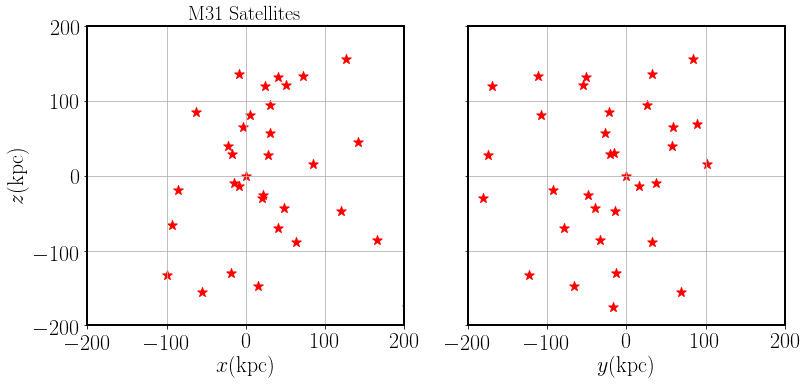

In [14]:
sat_M31 = np.loadtxt("/home/jordi/satellite/M31_sat.txt").T
print(np.shape(sat_M31))
x_M31, y_M31, z_M31 = sat_M31
r_M31 = np.sqrt(x_M31**2 + y_M31**2 +z_M31**2)
th_M31 = np.arccos(z_M31/r_M31)
phi_M31 = np.arctan2(y_M31,x_M31)
pts.plotmultiple2(x_M31, y_M31, z_M31,'M31 Satellites',
              '/home/jordi/satellite/m31_satellites_2', R=200, units =True)

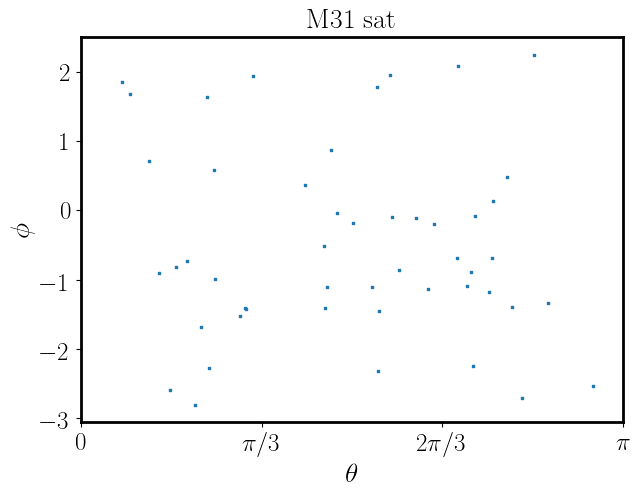

In [15]:
pts.scater(th_M31,phi_M31,r'$\theta$',r'$\phi$','M31 sat',ylim=(0,0),xlim=(0,0), xangular = True, 
           z3D=False, z=[],angular =False, color = False, c=[], clab = '',
           errorbar= False, yerr= [],
           name = '', dpi = 250, R = 200, save = True, s = 1., extra_data=False,
           x_extra = [], y_extra= [], extra_err=False, yerr_extra=None,
           xerr_extra= None, extratext = False, texts = [])

(50,)
(49,)
moda ModeResult(mode=array([0.23803874]), count=array([1]))
        $\theta$
count  49.000000
mean    1.550925
std     0.756230
min     0.238039
25%     0.779039
50%     1.685055
75%     2.237650
max     2.966320


<Figure size 600x500 with 0 Axes>

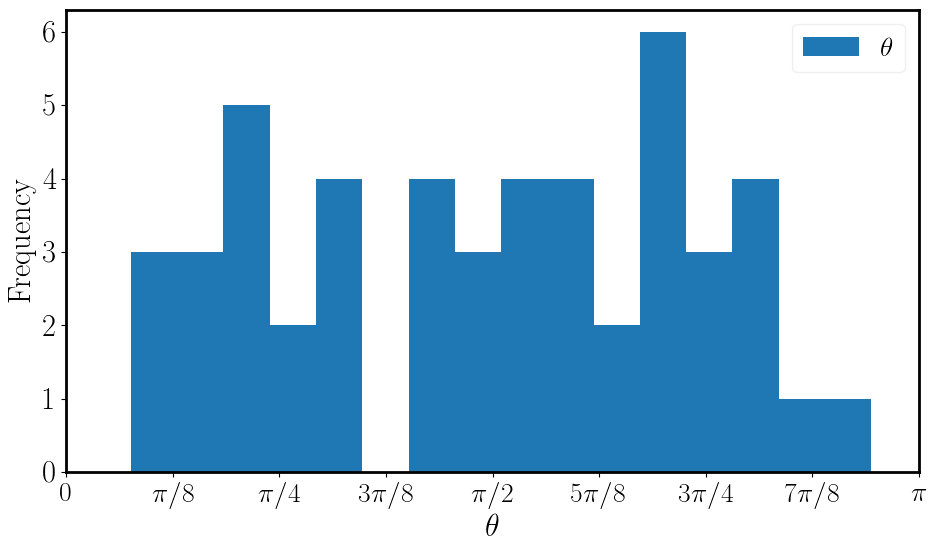

In [16]:
pts.histo(th_M31, r'$\theta$', bins = 16, rang=(0,0),nom_archivo ='', fit = False,
          dist = 'norm',normalized = False,title='',
          logx = False, dens = False, xangular = True)

In [17]:
c_M31 = SkyCoord(x=x_M31, y=y_M31, z=z_M31, unit='kpc', frame= 'galactocentric',representation_type='cartesian')
c_M31.representation_type = 'spherical'

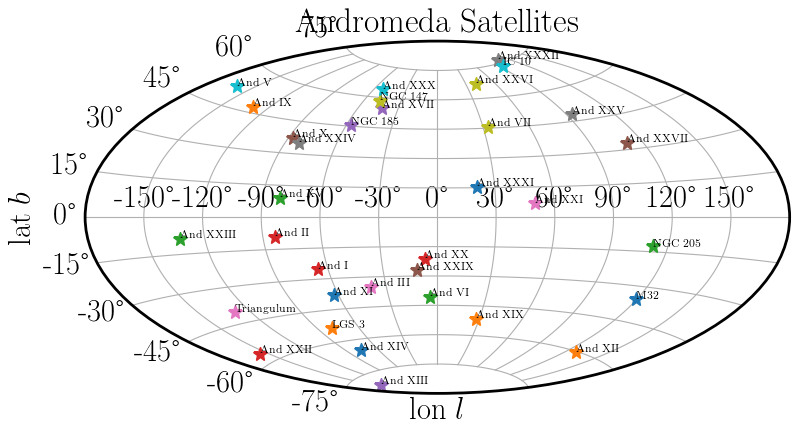

In [18]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,2,1,projection='aitoff')
ax.set_title("Andromeda Satellites")
satnames = X2.name
for i in range(1,35):
    ax.plot(c_M31[i].lon.wrap_at(180*u.deg).radian, c_M31[i].lat.radian, marker='*', markersize= 10)
    ax.text(c_M31[i].lon.wrap_at(180*u.deg).radian, c_M31[i].lat.radian, satnames[i], fontsize=8)
ax.grid()
ax.set_xlabel('lon $l$')
ax.set_ylabel('lat $b$')
plt.savefig('/home/jordi/satellite/m31_satellites_3', dpi=100, bbox_inches='tight')
plt.show()